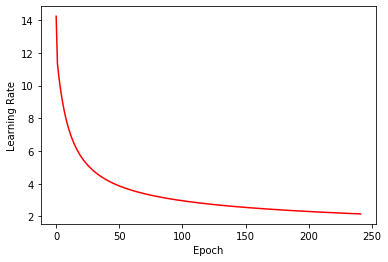

Accuracy_score=
1.0
Classification report=
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Confusion matrix=
[[41  0]
 [ 0 16]]


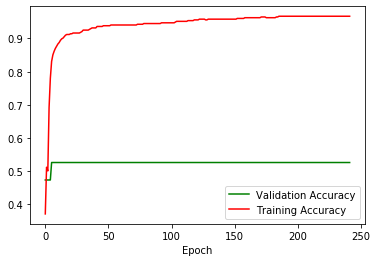

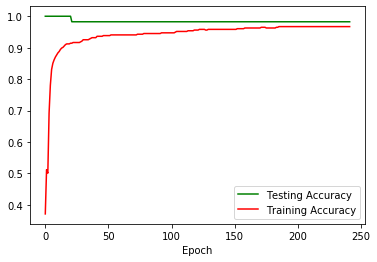

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 25 09:51:57 2019

@author: Astrid
"""

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas
import numpy as np

#Read Datafile using Pandas
data = pandas.read_csv('wdbc.csv')

#Drop idcolumn
data=data.drop(columns='ID')#569*31

#Update Diagnosis column
data.loc[data.Diagnosis=='B','Diagnosis'] = '0'
data.loc[data.Diagnosis=='M','Diagnosis'] = '1'

#Take x1 to x30 cols only
data_X=data.iloc[:,1:]#569*30
#Take the Diagnosis column only
data_Y=data.iloc[:,0:1]#569*1

#Normalize the entire dataset and saving it in 'data'
x=data.values
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
data=pandas.DataFrame(x_scaled)


# Split our data into train and test training is 80% rest is 20%
train_data, test1  = train_test_split(data,test_size=0.20,random_state=42)

#Split the test1 data into validation and test set 50 %, 50%
validate_data,test_data=train_test_split(test1,test_size=0.50,random_state=42)

#Splitting data for X_train and Y_train
X_train_data=train_data[train_data.columns[1:32]]#455*30
Y_train_data=train_data[train_data.columns[0:1]]#455*1

X_validate_data=validate_data[validate_data.columns[1:32]]#57*30
Y_validate_data=validate_data[validate_data.columns[0:1]]#57*1

X_test_data=test_data[test_data.columns[1:32]]#57*30
Y_test_data=test_data[test_data.columns[0:1]]#57*1

#Epoch and learning rate
epochs = 242
learningrate = 0.1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cal_sigmoid(data_X,w,b):
    z=np.dot(data_X,w)+b
    return np.round(sigmoid(z))

#Calculate cost
def cal_cost(Data_X,Data_Y,w,m):
    z=np.dot(Data_X,w)+b
    pdt=sigmoid(z)
    cost = -np.sum(np.multiply(np.log(pdt), Data_Y) + np.multiply((1 - Data_Y), np.log(1 - pdt)))/m
    return cost,pdt

losstrack_train = []
losstrack_validate=[]
losstrack_test=[]

accuracytrack_train=[]
accuracytrack_validate=[]
accuracytrack_test=[]

mt =X_train_data.shape[1]
mv=X_validate_data.shape[1]
mts=X_test_data.shape[1]
#For the weights
wt = np.random.randn(X_train_data.shape[1], 1)*0.01
wts=np.random.randn(X_test_data.shape[1],1)*0.01

b = 1
wv=np.random.randn(X_validate_data.shape[1],1)*0.01
for epoch in range(epochs):
    train_cost,train_predict=cal_cost(X_train_data,Y_train_data,wt,mt)
    validate_cost,validate_predict=cal_cost(X_validate_data,Y_validate_data,wv,mv)
    
    losstrack_train.append(np.squeeze(train_cost))
    losstrack_validate.append(np.squeeze(validate_cost))
    
    accuracy_score_train=accuracy_score(Y_train_data,train_predict.round())
    accuracytrack_train.append(np.squeeze(accuracy_score_train))
    
    accuracy_score_validate=accuracy_score(Y_validate_data,validate_predict.round())
    accuracytrack_validate.append(np.squeeze(accuracy_score_validate))
    
    dz = train_predict-Y_train_data
    dw = (1 / mt) * np.dot(X_train_data.T, dz) 
    db = float((1 / mt) * np.sum(dz))
    wt = wt - learningrate * dw
    b = b - learningrate * db
#Plotting graph    
plt.plot(losstrack_train,'r',label='Training Loss')   
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')    
plt.show()

#Calculating the Accuracy,Precision and Recall
value=cal_sigmoid(X_test_data,wt,b)
print('Accuracy_score=')
print(accuracy_score(Y_test_data,value))
print('Classification report=')
print(classification_report(Y_test_data,value))
print('Confusion matrix=')
print(confusion_matrix(Y_test_data,value))


plt.plot(accuracytrack_validate,'g',label='Validation Accuracy')
plt.plot(accuracytrack_train,'r',label='Training Accuracy')
plt.xlabel('Epoch')
##plt.ylabel('Training Accuracy') 
plt.legend()
plt.show()


for epoch in range(epochs):
    test_cost,test_predict=cal_cost(X_test_data,Y_test_data,wt,mt)
    losstrack_test.append(np.squeeze(test_cost))
    
    accuracy_score_test=accuracy_score(Y_test_data,test_predict.round())
    accuracytrack_test.append(np.squeeze(accuracy_score_test))
    
    dz = test_predict-Y_test_data
    dw = (1 / mts) * np.dot(X_test_data.T, dz) 
    db = float((1 / mts) * np.sum(dz))
    wt = wt - learningrate * dw
    b = b - learningrate * db


plt.plot(accuracytrack_test,'g',label='Testing Accuracy')
plt.plot(accuracytrack_train,'r',label='Training Accuracy')
plt.xlabel('Epoch')
##plt.ylabel('Testing Accuracy') 
plt.legend()
plt.show()


